# **Assignment 5**

### **1. Batch Normalization**

In [1]:
# nn layers
linear1 = torch.nn.Linear(784, 32, bias = True)
linear2 = torch.nn.Linear(32, 32, bias = True)
linear3 = torch.nn.Linear(32, 10, bias = True)

relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32) # Batch Normalization for 1D data
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias = True)
nn_linear2 = torch.nn.Linear(32, 32, bias = True)
nn_linear3 = torch.nn.Linear(32, 10, bias = True)

bn_model = torch.nn.Sequential(linear1, bn1, relu,
                               linear2, bn2, relu,
                               linear3).to(device)

nn_model = torch.nn.Sequential(linear1, relu,
                               linear2, relu,
                               linear3).to(device)

NameError: name 'torch' is not defined

In [1]:
# If not using torch.nn.Sequential, you can use class module!!!
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    #in __init__, initialize the layers you'd like to use
    self.fc1 = nn.Linear(100,50)
    self.bn = nn.BatchNorm1d(num_features=50)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.bn(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

In [2]:
# BatchNorm 1D
m = nn.BatchNorm1d(100) # 행에 대해서 normalization 그러므로 feature 개수를 100으로 설정해야함
input = torch.randn(20,100)
output1 = m(input)

# BatchNorm 2D
m = nn.BatchNorm2d(100)
input = torch.randn(20,100,35,45)
output2 = m(input)

print(output1.size(), '\n\n', output2.size())

torch.Size([20, 100]) 

 torch.Size([20, 100, 35, 45])


### **Q1. Compare & Contrast BatchNorm1d and Batchnorm 2d**

In [3]:
# BatchNorm 1D
m = nn.BatchNorm1d(100) # 행에 대해서 normalization 그러므로 feature 개수를 100으로 설정해야함
input = torch.randn(20,100)
output1 = m(input)

# BatchNorm 2D
m = nn.BatchNorm2d(100)
input = torch.randn(20,100,35,45)
output2 = m(input)

print(output1.size(), '\n\n', output2.size())

torch.Size([20, 100]) 

 torch.Size([20, 100, 35, 45])


nn.BatchNorm1D는 input이 2D나 3D일 때 사용합니다.그래서 주로 classifier에 많이 사용되는데 이때 input의 형태는 [batch, length] 또는 [batch, channel, length]를 가집니다.

반면에 nn.BatchNorm2D는 input이 4D일 때 사용합니다. 그래서 주로 Conv2d layer에서 많이 사용되는 배치정규화 함수입니다. 이때 input의 형태는 [batch, ch, h, w]를 가집니다.

### **2. Weight Initialization**

### Quick Question

딥러닝 모델 학습이라고 하는 것은 결국 예측과 실제가 얼마나 다른가를 구해서 그 차이가 줄어들 수 있도록 파라미터를 수정해나가는 과정입니다. 하지만 처음 모델을 구성할 때는 임의로 파라미터(가중치, 편향)을 설정해주어야 그 파라미터를 수정해서 모델을 개선할 수 있습니다. 이렇게 처음 파라미터를 설정해주는 것을 초기화(initializtion)이라고 합니다.

Xavier initialization 은 활성함수가 sigmoid 함수일 때 사용하기 좋은 가중치 초기화 방법입니다. ReLU 함수일 때 사용하면 출력 값이 0으로 수렴하는 현상이 발생. 이 초기화 방법은 이전 노드와 다음 노드의 개수에 의존합니다.

He initialization 은 활성함수가 ReLU 함수일 때 사용하기 좋은 가중치 초기화 방법입니다.

In [4]:
import torch
import torch.nn as nn
import torch.nn.init as init

In [5]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1,16,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(16,32,3,padding=1),
        nn.ReLU(),
        nn.Maxpool2d(2,2),
        nn.Conv2d(32,64,3,padding=1),
        nn.ReLU(),
        nn.Maxpool2d(2,2)
    )
    self.fc_layer = nn.Sequetial(
        nn.Linear(64*7*7, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

    # 초기화 하는 방법
    # 모델의 모듈을 차례대로 불러옵니다.
    for m in self.modules():
      # 만약 그 모듈이 nn.Conv2d인 경우
      if isinstance(m, nn.Conv2d):

        '''
        # 작은 숫자로 초기화하는 방법
        # 가중치를 평균 0, 편차 0.02로 초기화합니다.
        # bias를 0으로 초기화합니다.
        m.weight.data.normal_(0.0, 0.02)
        m.bias.data.fill_(0)

        # Xavier Initialization
        # 모듈의 가중치를 xavier normal로 초기화합니다.
        # 편차를 0으로 초기화합니다.
        init.xavier_normal(m.weight.data)
        m.bias.data.fill_(0)

        # Kaiming He Initialization
        # 모듈의 가중치를 kaiming he normal로 초기화합니다.
        # 편차를 0으로 초기화합니다.
        '''

        init.kaiming_normal_(m.weight.data)
        m.bias.data.fill_(0)

      # 만약 그 모듈이 nn.Linear인 경우
      elif isinstance(m, nn.Linear):

        '''
        # 작은 숫자로 초기화하는 방법
        # 가중치를 평균 0, 편차 0.02로 초기화합니다.
        # bias를 0으로 초기화합니다.
        m.weight.data.normal_(0.0, 0.02)
        m.bias.data.fill_(0)

        # Xavier Initialization
        # 모듈의 가중치를 xavier normal로 초기화합니다.
        # 편차를 0으로 초기화합니다.
        init.xavier_normal(m.weight.data)
        m.bias.data.fill_(0)

        # Kaiming He Initialization
        # 모듈의 가중치를 kaiming he normal로 초기화합니다.
        # 편차를 0으로 초기화합니다.
        '''

        init.kaiming_normal_(m.weight.data)
        m.bias.data.fill_(0)

    def forward(self,x):
      out = self.fc_layer(x)
      out = out.view(batch_size,-1)
      out = self.fc_layer(out)
      return out

In [6]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# 각 활성 함수를 직접 정의

# Sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
  return np.maximum(0, x)

# tanh
def tanh(x):
  return np.tanh(x)

def weight_init(method = None):
  '''
  가중치 초기화 함수
    Args:
        - method: 가중치 초기화 방법(large, small, xavier, relu)
    Returns:
        - np.array형태의 가중치 초기값
  '''
  w = 0
  if method == 'large':
    w = np.random.randn(node_num, node_num) * 1
  elif method == 'small':
    w = np.random.randn(node_num, node_num) * 0.01
  elif method == 'xavier':
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) # Xavier init
  elif method == 'he':
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) # He init

  return w

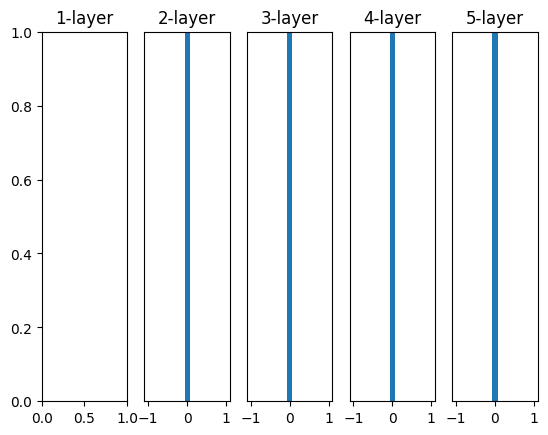

In [7]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = weight_init('small')
  a = np.dot(x,w)

  # x = sigmoid(a)
  # x = ReLU(a)
  z = tanh(a)

  activations[i] = z

for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  if i != 0:
    plt.yticks([], [])

  # plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1))

plt.show()

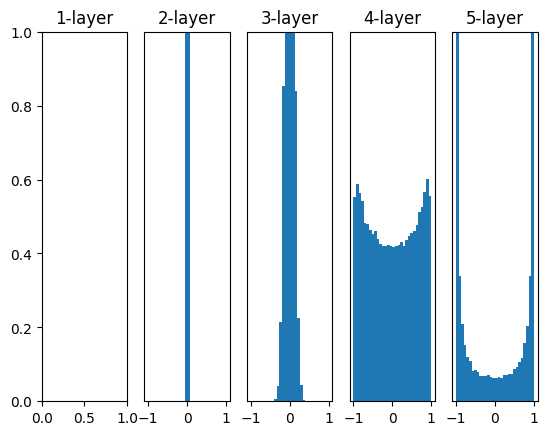

In [8]:
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = weight_init('large')
  a = np.dot(x, w)

  # z = sigmoid(a)
  # z = ReLU(a)
  z = tanh(a)

  activations[i] = z

for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1)+ "-layer")
  if i != 0:
    plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))

plt.show()

<ipython-input-9-8dca384381e3>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(activations), i+1)


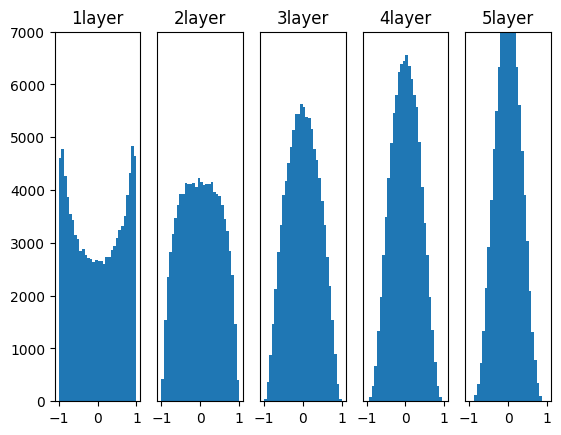

In [9]:
# Xavier Initialization

input_data = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = weight_init('xavier')
  a = np.dot(x, w)

  z = tanh(a)

  activations[i] = z

  for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "layer")
    if i != 0:
      plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0,7000)
    plt.hist(a.flatten(), 30, range=(-1,1))

plt.show()

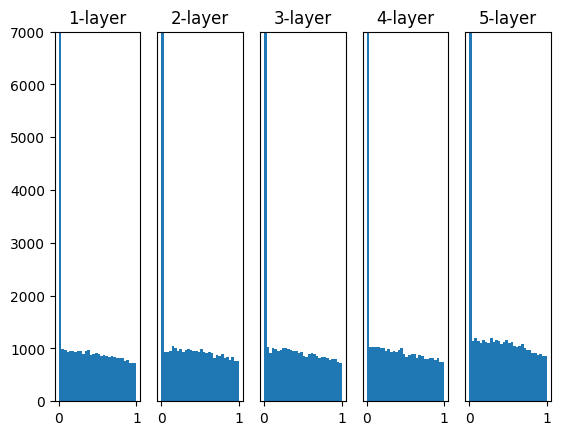

In [10]:
# He Initialization

input_data = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = weight_init('he')
  a = np.dot(x,w)

  z = ReLU(a)

  activations[i] = z

for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  if i != 0:
    plt.yticks([], [])
  # plt.xlim(0.1,1)
  plt.ylim(0,7000)
  plt.hist(a.flatten(), 30, range=(0,1))

plt.show()

# 3. CNN

### **Question**

Run two cells below and try to explain the change of tensor size after passing through the layers

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 5, stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 5, stride = 1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2", x.size())
    x = x.view(-1,10*12*12)
    print("After dimension reduction",x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = F.relu(self.fc2(x))
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20)) # input size : (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size = 2)
    self.max_pool2 = nn.MaxPool2d(kernel_size = 2)
    self.fc1 = nn.Linear(10 * 5 * 5, 50)
    self.fc2 = nn.Linear(50,10)
  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2", x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = F.relu(self.fc2(x))
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


In [13]:
# Now let's construct a CNN model

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [16]:
train_data = datasets.MNIST('./data/', train = True, download = True, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
]))
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 50, shuffle = True)

test_data = datasets.MNIST('./data/', train=False, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.11307,), (0.3081,))
]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

In [17]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 50, kernel_size = 5, stride = 1)
    self.fc1 = nn.Linear(4 * 4 * 50, 500)
    self.fc2 = nn.Linear(500, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x , kernel_size = 2, stride = 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size = 2, stride = 2)

    x = x.view(-1, 4 * 4 * 50)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [18]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr = 0.01)

In [19]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index%100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.295562505722046
loss of 0 epoch, 100 index : 1.3569955825805664
loss of 0 epoch, 200 index : 0.4262641668319702
loss of 0 epoch, 300 index : 0.529350221157074
loss of 0 epoch, 400 index : 0.33706963062286377
loss of 0 epoch, 500 index : 0.19445015490055084
loss of 0 epoch, 600 index : 0.2606964409351349
loss of 0 epoch, 700 index : 0.2402684986591339
loss of 0 epoch, 800 index : 0.10463626682758331
loss of 0 epoch, 900 index : 0.44982293248176575
loss of 0 epoch, 1000 index : 0.06934403628110886
loss of 0 epoch, 1100 index : 0.05472129210829735
loss of 1 epoch, 0 index : 0.14999589323997498
loss of 1 epoch, 100 index : 0.10692353546619415
loss of 1 epoch, 200 index : 0.10692835599184036
loss of 1 epoch, 300 index : 0.12658661603927612
loss of 1 epoch, 400 index : 0.03184455260634422
loss of 1 epoch, 500 index : 0.10711594671010971
loss of 1 epoch, 600 index : 0.06321322172880173
loss of 1 epoch, 700 index : 0.2054097056388855
loss of 1 epoch, 800 index : 0.

### **Quick Question**

Write an explanation of the code below

In [20]:
cnn.eval() # cnn 네트워크를 테스트하기 위해서 모드를 변경하는 과정, 실행하면 드롭아웃이나 정규화를 비활성화 하거나 다르게 실행
test_loss = 0
correct = 0 # 테스트 loss 와 정확도 측정을 위한 변수를 초기화
with torch.no_grad(): # 테스트 과정에서는 그라디언트 학습을 하지 않기 때문에 그라디언트 계산을 하지 않기 위한 코드
  for data, target in test_loader:
    output = cnn(data) # 테스트 데이터를 네트워크에 입력해서 결과값을 도출
    test_loss += criterion(output, target).item() # 테스트 손실을 누적하여 계산, 여기서 더하는 값은 예측값과 타겟의 차이값이다.
    pred = output.argmax(dim=1, keepdim=True) # 예측값(output) 텐서를 텐서의 차원은 유지한 상태로 '1'의 방향(여기서는 class)에 대해서 최대값을 가지는 값의 class로 이루어진 텐서로 변환
    correct += pred.eq(target.view_as(pred)).sum().item() # 그 텐서를 받아서 타겟과 같으면 1을 더하여 총 몇 개의 데이터에 대해서 class를 맞췄는지 세는 과정.
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 6.1161, Accuracy: 9900/10000 (99%)



### **Question (optional)**

Try to adjust the hyperparameters (kernel size, # of conv layers, ...) and get better results than the baseline (default) model!!

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [22]:
train_data = datasets.MNIST('./data/', train = True, download = True, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
]))
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 50, shuffle = True)

test_data = datasets.MNIST('./data/', train=False, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.11307,), (0.3081,))
]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

In [23]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 50, kernel_size = 5, stride = 1)
    self.fc1 = nn.Linear(4 * 4 * 50, 500)
    self.fc2 = nn.Linear(500, 10)
    self.dropout = nn.Dropout(0.25)
    self.bn1 = nn.BatchNorm1d(num_features = 4 * 4 * 50)
    self.bn2 = nn.BatchNorm1d(num_features = 500)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x , kernel_size = 2, stride = 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size = 2, stride = 2)

    x = x.view(-1, 4 * 4 * 50)
    x = self.bn1(x)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.bn2(x)
    x = self.dropout(x)
    x = self.fc2(x)
    return x

In [24]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr = 0.01)

In [25]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index%100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.2688236236572266
loss of 0 epoch, 100 index : 0.310848206281662
loss of 0 epoch, 200 index : 0.26203566789627075
loss of 0 epoch, 300 index : 0.15536800026893616
loss of 0 epoch, 400 index : 0.0786949172616005
loss of 0 epoch, 500 index : 0.26714321970939636
loss of 0 epoch, 600 index : 0.18917876482009888
loss of 0 epoch, 700 index : 0.1341477930545807
loss of 0 epoch, 800 index : 0.09751254320144653
loss of 0 epoch, 900 index : 0.048969607800245285
loss of 0 epoch, 1000 index : 0.0940931960940361
loss of 0 epoch, 1100 index : 0.05482569709420204
loss of 1 epoch, 0 index : 0.020214548334479332
loss of 1 epoch, 100 index : 0.04053620994091034
loss of 1 epoch, 200 index : 0.18288271129131317
loss of 1 epoch, 300 index : 0.05179416760802269
loss of 1 epoch, 400 index : 0.08964300155639648
loss of 1 epoch, 500 index : 0.09127306193113327
loss of 1 epoch, 600 index : 0.14438506960868835
loss of 1 epoch, 700 index : 0.09034275263547897
loss of 1 epoch, 800 index

In [26]:
cnn.eval() # cnn 네트워크를 테스트하기 위해서 모드를 변경하는 과정, 실행하면 드롭아웃이나 정규화를 비활성화 하거나 다르게 실행
test_loss = 0
correct = 0 # 테스트 loss 와 정확도 측정을 위한 변수를 초기화
with torch.no_grad(): # 테스트 과정에서는 그라디언트 학습을 하지 않기 때문에 그라디언트 계산을 하지 않기 위한 코드
  for data, target in test_loader:
    output = cnn(data) # 테스트 데이터를 네트워크에 입력해서 결과값을 도출
    test_loss += criterion(output, target).item() # 테스트 손실을 누적하여 계산, 여기서 더하는 값은 예측값과 타겟의 차이값이다.
    pred = output.argmax(dim=1, keepdim=True) # 예측값(output) 텐서를 텐서의 차원은 유지한 상태로 '1'의 방향(여기서는 class)에 대해서 최대값을 가지는 값의 class로 이루어진 텐서로 변환
    correct += pred.eq(target.view_as(pred)).sum().item() # 그 텐서를 받아서 타겟과 같으면 1을 더하여 총 몇 개의 데이터에 대해서 class를 맞췄는지 세는 과정.
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 4.3305, Accuracy: 9932/10000 (99%)



# **네트워크 구조**

In [45]:
!pip install torchsummary

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

In [51]:
train_data = datasets.MNIST('./data/', train = True, download = True, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
]))
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 50, shuffle = True)

test_data = datasets.MNIST('./data/', train=False, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.11307,), (0.3081,))
]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

In [56]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 50, kernel_size = 5, stride = 1)
    self.fc1 = nn.Linear(4 * 4 * 50, 500)
    self.fc2 = nn.Linear(500, 10)
    self.dropout = nn.Dropout(0.25)
    self.bn1 = nn.BatchNorm1d(num_features = 4 * 4 * 50)
    self.bn2 = nn.BatchNorm1d(num_features = 500)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x , kernel_size = 2, stride = 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size = 2, stride = 2)

    x = x.view(-1, 4 * 4 * 50)
    x = self.bn1(x)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.bn2(x)
    x = self.dropout(x)
    x = self.fc2(x)
    return x

cnn.cuda()
summary(cnn, input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
       BatchNorm1d-3                  [-1, 800]           1,600
           Dropout-4                  [-1, 800]               0
            Linear-5                  [-1, 500]         400,500
       BatchNorm1d-6                  [-1, 500]           1,000
           Dropout-7                  [-1, 500]               0
            Linear-8                   [-1, 10]           5,010
Total params: 433,680
Trainable params: 433,680
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 1.65
Estimated Total Size (MB): 1.79
----------------------------------------------------------------


In [58]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr = 0.01, betas = (0.9,0.999))

In [59]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index%100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.497391700744629
loss of 0 epoch, 100 index : 0.2288910448551178
loss of 0 epoch, 200 index : 0.05927053093910217
loss of 0 epoch, 300 index : 0.04273258522152901
loss of 0 epoch, 400 index : 0.31213122606277466
loss of 0 epoch, 500 index : 0.06007274612784386
loss of 0 epoch, 600 index : 0.1674632430076599
loss of 0 epoch, 700 index : 0.43998610973358154
loss of 0 epoch, 800 index : 0.21984317898750305
loss of 0 epoch, 900 index : 0.06116442754864693
loss of 0 epoch, 1000 index : 0.5188318490982056
loss of 0 epoch, 1100 index : 0.11526349186897278
loss of 1 epoch, 0 index : 0.04514595866203308
loss of 1 epoch, 100 index : 0.6949446797370911
loss of 1 epoch, 200 index : 0.22142484784126282
loss of 1 epoch, 300 index : 0.014098779298365116
loss of 1 epoch, 400 index : 0.08745333552360535
loss of 1 epoch, 500 index : 0.042251165956258774
loss of 1 epoch, 600 index : 0.04068055748939514
loss of 1 epoch, 700 index : 0.051011744886636734
loss of 1 epoch, 800 inde

In [61]:
cnn.eval() # cnn 네트워크를 테스트하기 위해서 모드를 변경하는 과정, 실행하면 드롭아웃이나 정규화를 비활성화 하거나 다르게 실행
test_loss = 0
correct = 0 # 테스트 loss 와 정확도 측정을 위한 변수를 초기화
with torch.no_grad(): # 테스트 과정에서는 그라디언트 학습을 하지 않기 때문에 그라디언트 계산을 하지 않기 위한 코드
  for data, target in test_loader:
    output = cnn(data) # 테스트 데이터를 네트워크에 입력해서 결과값을 도출
    test_loss += criterion(output, target).item() # 테스트 손실을 누적하여 계산, 여기서 더하는 값은 예측값과 타겟의 차이값이다.
    pred = output.argmax(dim=1, keepdim=True) # 예측값(output) 텐서를 텐서의 차원은 유지한 상태로 '1'의 방향(여기서는 class)에 대해서 최대값을 가지는 값의 class로 이루어진 텐서로 변환
    correct += pred.eq(target.view_as(pred)).sum().item() # 그 텐서를 받아서 타겟과 같으면 1을 더하여 총 몇 개의 데이터에 대해서 class를 맞췄는지 세는 과정.
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 798.7738, Accuracy: 9849/10000 (98%)



In [ ]:
'''
우선 기존의 네트워크에서 dropout 과 normalization을 추가해서 학습을 한 결과
테스트셋 loss가 줄어드는 것을 확인할 수 있었고 정확도도 소폭 상승하는 것을 확인했다.
그 이후 optimizer를 Adam으로 바꾸어서 dropout 과 normalization을 동일하게 적용하여
네트워크를 생성해서 학습한 결과 테스트셋 loss가 엄청나게 증가하는 것을 확인했다. 정확도 자체는
크게 떨어지지 않았는데 몇몇 네트워크에 맞지 않는 데이터가 loss를 증가시킨 것 같다는게 내 의견.
'''